In [22]:
#install.packages('randomForest')
library(randomForest)
library(readxl)
library(tidyverse)
#install.packages('caret')
library(Rcpp)
library(caret)
library(rpart)
#install.packages('tree')
library(tree)
#install.packages('multcomp')
library(multcomp)
#install.packages('party')
library(party)
library(tree)
#install.packages('ISLR')
library(ISLR)

Installing package into 'C:/Users/hichul/Documents/R/win-library/4.0'
(as 'lib' is unspecified)



package 'ISLR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\hichul\AppData\Local\Temp\RtmpYJu2bC\downloaded_packages


Warning message:
"package 'ISLR' was built under R version 4.0.3"


# Classification

In [3]:
df.wa = read.csv(file = "../../results/df-water-access.csv")
df.explore = read.csv(file = "../../results/df-water-explore.csv")
df = read.csv(file = "../../results/dfsimple.csv")
head(df)
head(df.wa)

,Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,Afghanistan,2015,DHS,71.2,2.3,4.8,14.2,20.1,18.5,4.7,...,45.3,45.2,8.2,30.0,5.8,35.2,11.8,0.0,0.1,1
2,Albania,2018,DHS,98.4,48.8,5.2,2.4,1.4,4.1,2.5,...,77.9,20.6,1.1,26.4,3.2,9.6,37.0,0.7,0.1,2
3,Angola,2016,DHS,66.9,4.3,9.7,10.3,1.9,9.1,3.3,...,34.5,46.1,15.6,4.6,1.3,17.8,10.9,0.4,0.3,3
4,Armenia,2016,DHS,99.9,88.3,8.0,0.5,0.2,0.2,1.0,...,97.6,1.6,0.1,8.6,0.4,0.2,39.2,0.3,0.1,2
5,Azerbaijan,2006,DHS,90.6,34.0,19.7,3.5,9.3,6.2,7.5,...,75.9,18.7,4.4,6.9,3.3,1.1,20.4,0.1,0.0,4
6,Bangladesh,2014,DHS,97.8,4.3,3.3,2.7,86.4,0.2,0.0,...,75.5,22.7,1.6,25.1,0.0,6.4,0.8,0.0,0.3,1


,X,Country,ptap,bore,pspr,uspr,pwel,uwel,surw,tles,tmor,rain,phom
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Afghanistan,14.2,20.1,4.7,8.6,18.5,11.1,7.3,45.2,8.2,0.4,2.3
2,2,Albania,2.4,1.4,2.5,0.8,4.1,0.8,0.0,20.6,1.1,0.0,48.8
3,3,Angola,10.3,1.9,3.3,4.8,9.1,8.3,18.0,46.1,15.6,1.7,4.3
4,4,Armenia,0.5,0.2,1.0,0.1,0.2,0.0,0.0,1.6,0.1,0.0,88.3
5,5,Azerbaijan,3.5,9.3,7.5,1.1,6.2,0.2,7.0,18.7,4.4,0.0,34.0
6,6,Bangladesh,2.7,86.4,0.0,0.3,0.2,0.6,1.2,22.7,1.6,0.4,4.3


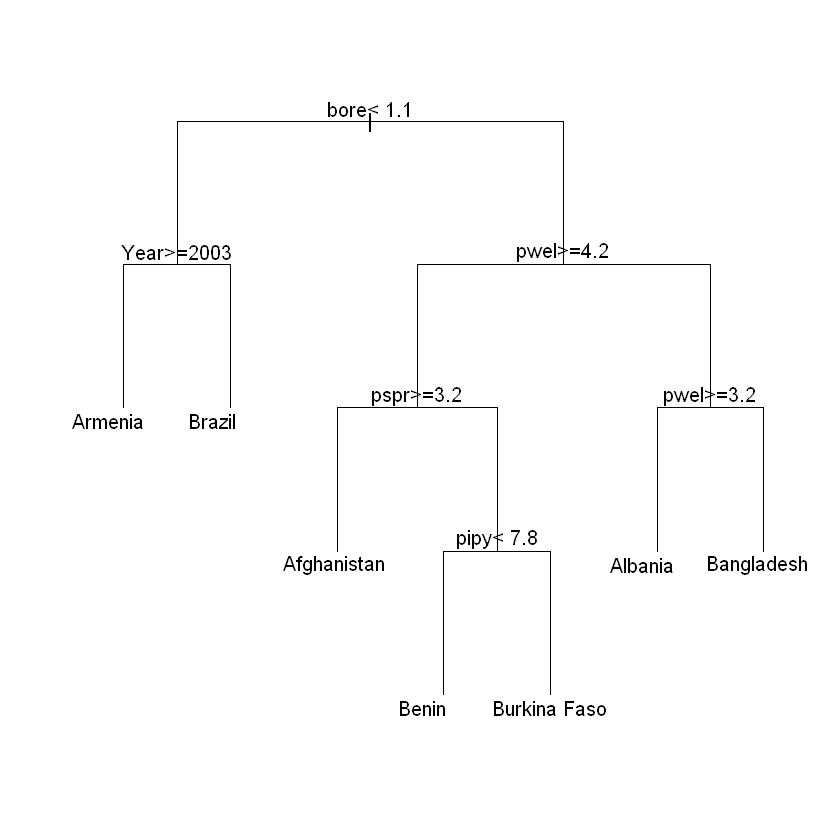

In [4]:
model <- rpart(Country ~., data = df)
par(xpd = NA) # otherwise on some devices the text is clipped
plot(model)
text(model, digits = 3)

The different rules in tree can be printed as follow:

In [5]:
print(model, digits = 2)

n= 78 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 78 77 Afghanistan (0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013 0.013)  
   2) bore< 1.1 25 24 Armenia (0 0 0 0.04 0 0 0 0.04 0.04 0 0.04 0 0 0.04 0 0 0.04 0 0 0 0.04 0.04 0.04 0 0 0.04 0 0 0.04 0 0.04 0.04 0 0 0 0.04 0.04 0 0 0 0 0 0 0.04 0 0.04 0 0.04 0 0 0 0 0.04 0 0 0 0 0.04 0.04 0 0 0.04 0 0 0 0 0 0 0 0 0.04 0 0 0.04 0.04 0 0 0)  
     4) Year>=2e+03 16 15 Armenia (0 0 0 0.062 0 0 0 0.062 0 0 0.062 0 0 0 0 0 0.062 0 0 0 0.062 0.062 0 0 0 0.062 0 0 0.062 0 0.062 0.062 0 0 0 0.062 0 0 0 0 0

These rules are produced by repeatedly splitting the predictor variables, starting with the variable that has the highest association with the response variable. The process continues until some predetermined stopping criteria are met.

# Example of data set

In [6]:
# Inspect the data
sample_n(df, 3)
# Split the data into training and test set
set.seed(123)
training.samples <- df$bore %>% 
  createDataPartition(p = 0.8, list = FALSE)
train.data  <- df[training.samples, ]
test.data <- df[-training.samples, ]




Country,Year,Survey,imws,phom,pipy,ptap,bore,pwel,pspr,...,watp,tles,tmor,bicy,acar,mcyc,pcar,boat,wigc,clusters
<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
Peru,2012,DHS,85.9,71.7,4.8,2.4,0.0,0.0,0.0,...,78.6,19.6,1.7,17.6,1.0,12.8,10.4,0.3,0.0,2
Tajikistan,2017,DHS,85.8,25.8,25.0,13.8,9.3,2.1,1.2,...,75.3,21.6,2.3,36.7,27.6,1.9,39.5,0.2,0.2,4
Philippines,2017,DHS,96.5,20.1,3.3,3.2,12.4,3.5,5.1,...,81.5,16.8,1.6,19.4,1.9,35.6,9.9,1.7,0.2,4


Fully grown trees
Here, we’ll create a fully grown tree showing all predictor variables in the data set.


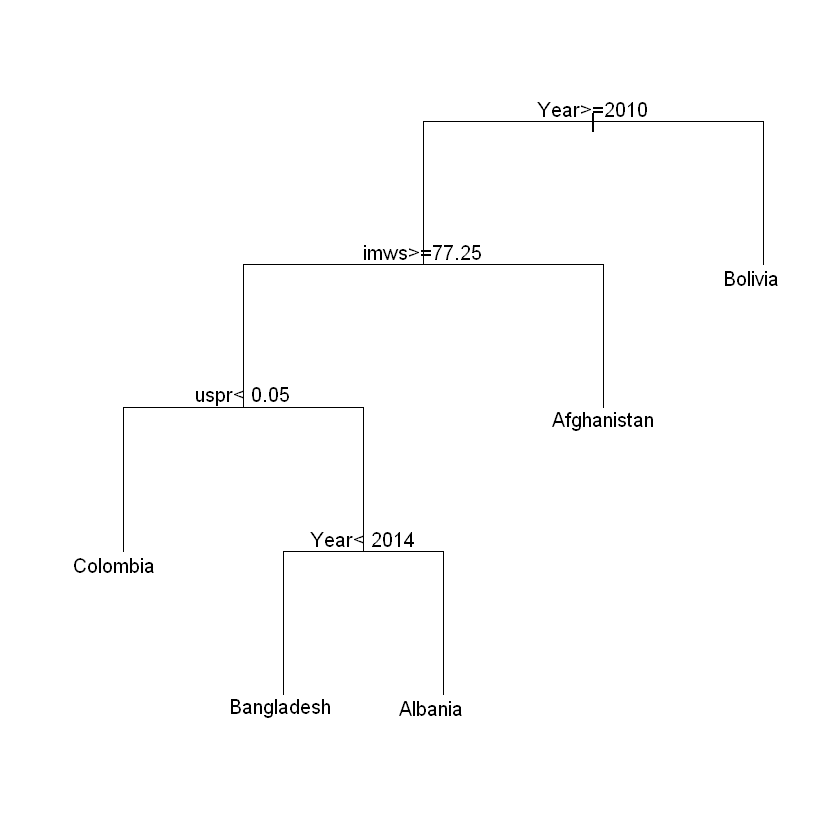

In [7]:
# Build the model
set.seed(123)
model1 <- rpart(Country ~., data = train.data, method = "class")
# Plot the trees
par(xpd = NA) # Avoid clipping the text in some device
plot(model1)
text(model1, digits = 3)

In [8]:
# Make predictions on the test data
predicted.classes <- model1 %>% 
  predict(test.data, type = "class")
head(predicted.classes)

4           5           7          15          19          31 
    Albania     Bolivia Afghanistan Afghanistan Afghanistan     Bolivia 
64 Levels: Afghanistan Albania Angola Bangladesh Bolivia ... Zimbabwe

In [9]:
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Zero is not good, something went wrong, ask the professor for help potentially. 

[1] 0

# Pruning the tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


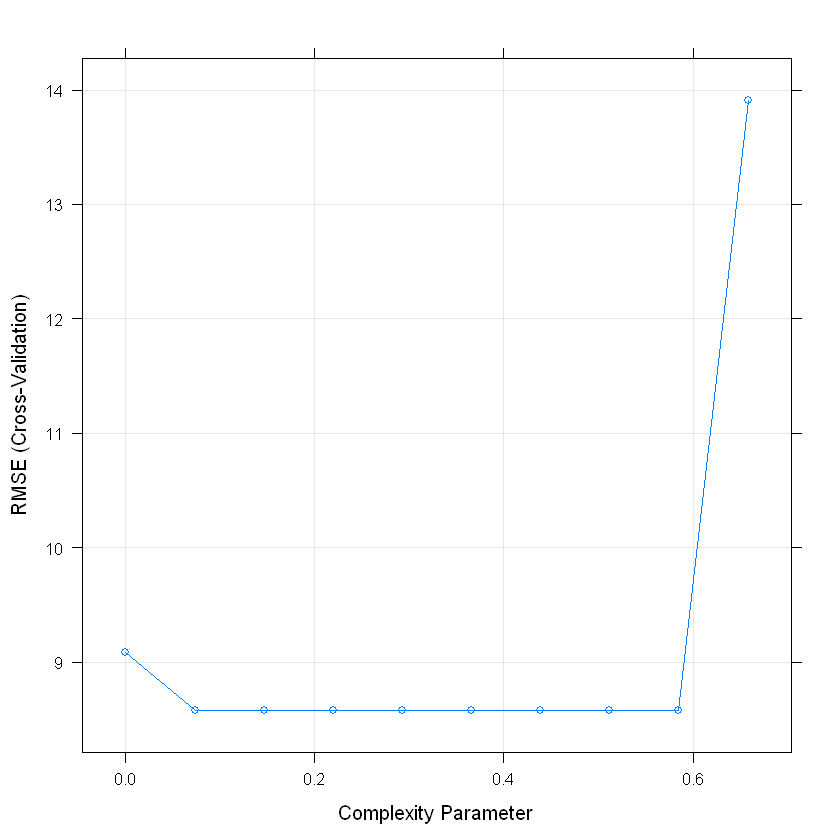

In [10]:
# Fit the model on the training set
set.seed(123)
model2 <- train(
  bore ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model accuracy vs different values of
# cp (complexity parameter)
plot(model2)

RMSE is computed as RMSE = mean((observeds - predicteds)^2) %>% sqrt(). The lower the RMSE, the better the model.

In [11]:
# Print the best tuning parameter cp that
# maximizes the model accuracy
model2$bestTune

,cp
,<dbl>
9,0.5851365


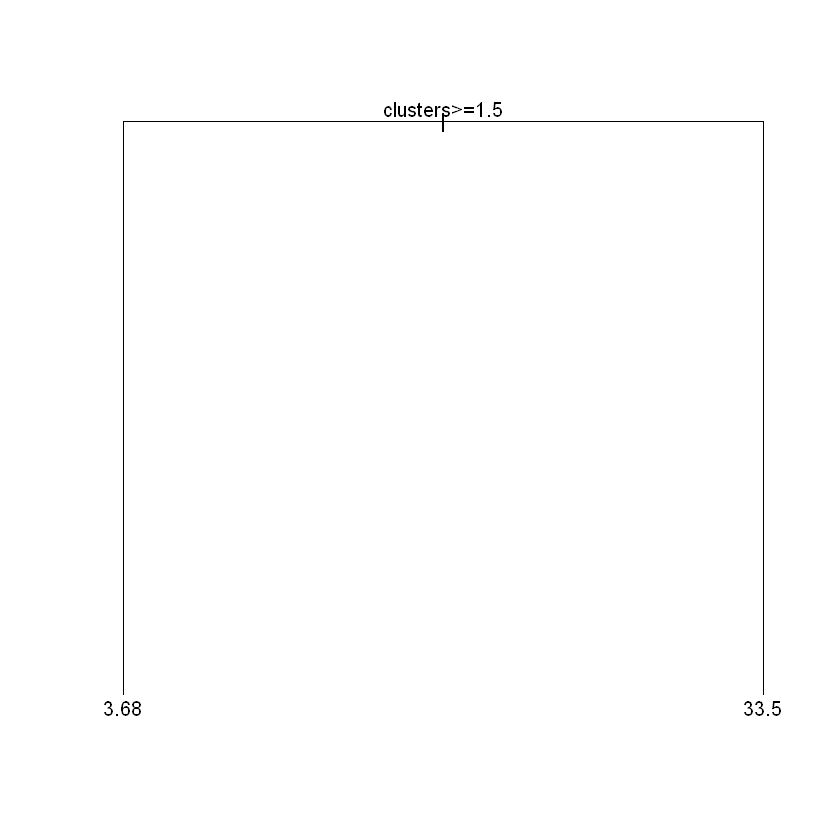

In [12]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model2$finalModel)
text(model2$finalModel,  digits = 3)

In [13]:
# Decision rules in the model
model2$finalModel

n= 64 

node), split, n, deviance, yval
      * denotes terminal node

1) root 64 17426.540 12.053120  
  2) clusters>=1.5 46  1207.538  3.678261 *
  3) clusters< 1.5 18  4747.484 33.455560 *

# Make predictions on the test data
predicted.classes <- model2 %>% predict(test.data)
# Compute model accuracy rate on test data
mean(predicted.classes == test.data$Country)
# Must understand what these function of codes actually implment. 

# Create the regression tree

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


,cp
,<dbl>
9,0.5851365


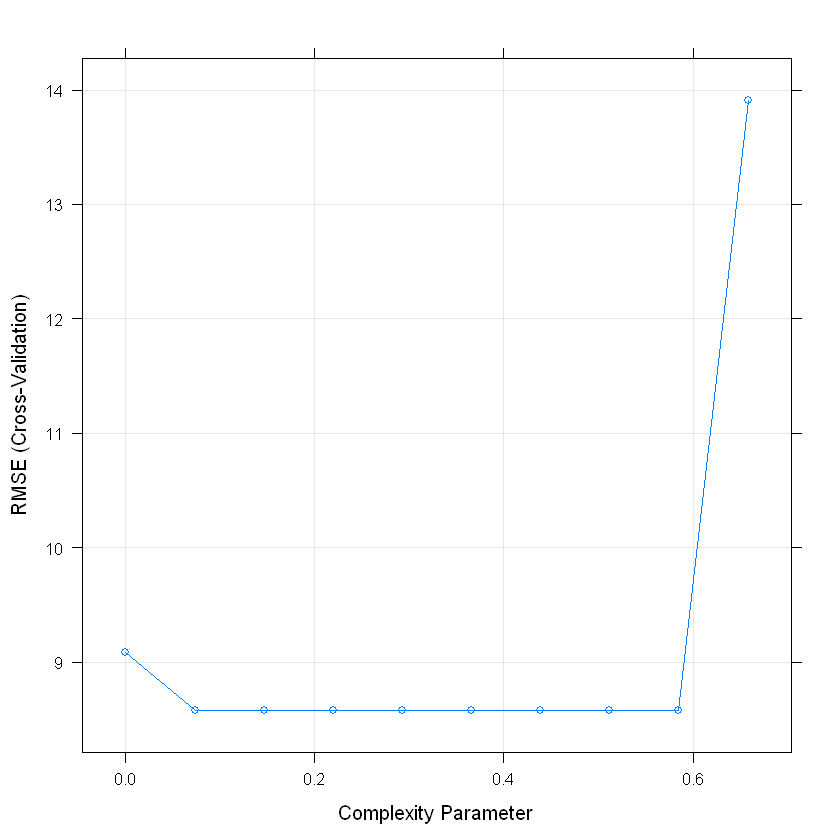

In [14]:
# Fit the model on the training set
set.seed(123)
model <- train(
  bore ~., data = train.data, method = "rpart",
  trControl = trainControl("cv", number = 10),
  tuneLength = 10
  )
# Plot model error vs different values of
# cp (complexity parameter)
plot(model)
# Print the best tuning parameter cp that
# minimize the model RMSE
model$bestTune

Here, the best cp value is the one that minimize the prediction error RMSE (root mean squared error).

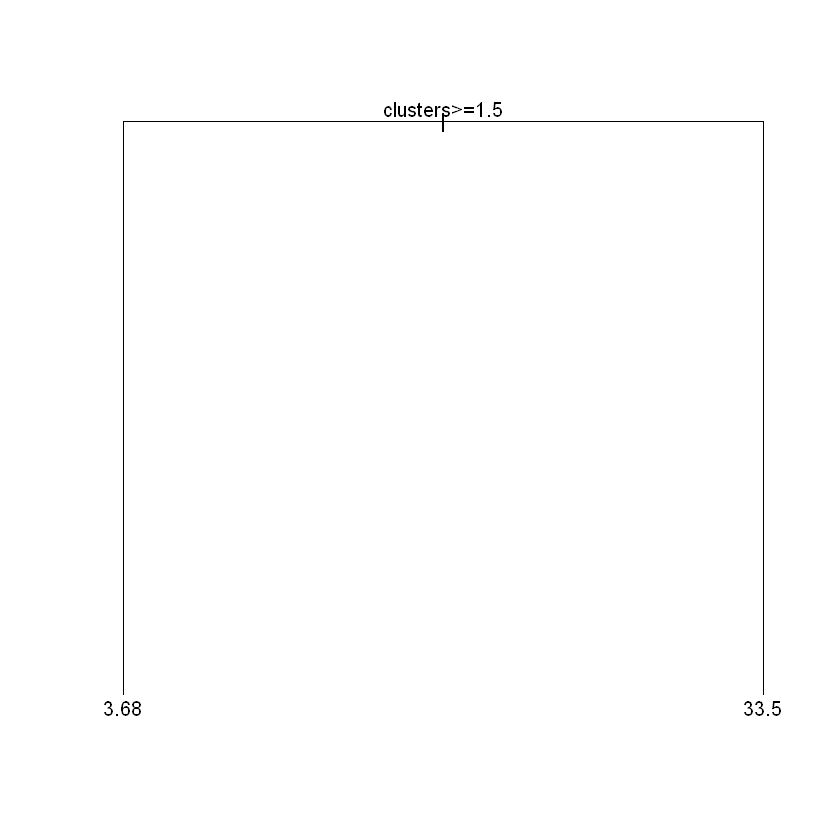

In [15]:
# Plot the final tree model
par(xpd = NA) # Avoid clipping the text in some device
plot(model$finalModel)
text(model$finalModel, digits = 3)

# Decision rules in the model
model$finalModel
# Make predictions on the test data
predictions <- model %>% predict(test.data)
head(predictions)
# Compute the prediction error RMSE
RMSE(predictions, test.data$Country)

# Conditionnal inference tree

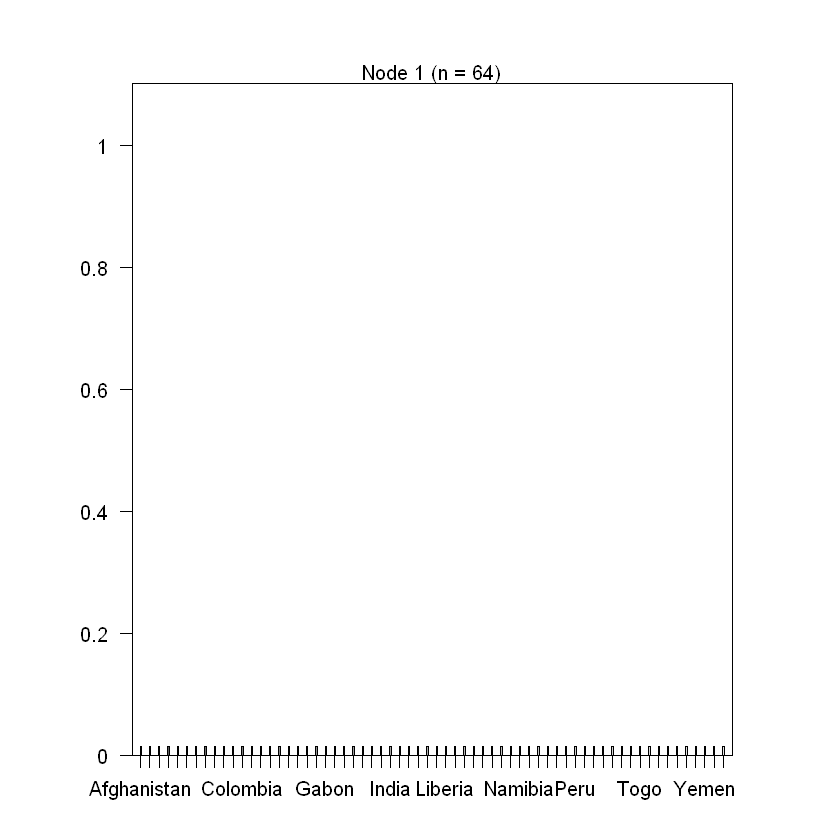

In [16]:
set.seed(123)
model <- train(
  Country ~., data = train.data, method = "ctree2",
  trControl = trainControl("cv", number = 10),
  tuneGrid = expand.grid(maxdepth = 3, mincriterion = 0.95 )
  )
plot(model$finalModel)

Reference: http://www.sthda.com/english/articles/35-statistical-machine-learning-essentials/141-cart-model-decision-tree-essentials/

# Fitting Classification Trees

Reference: https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/6009dd9fa7bc363aa822d2c7/1611259312432/ISLR+Seventh+Printing.pdf (338)

In [23]:
attach(df)
High=ifelse(bore <=.7,"No","Yes ")

Finally, we use the data.frame() function to merge High with the rest of
the borehole (borehole) data.